## Introducción
##### La problemática de la inasistencia a citas médicas es un desafío multifacético en el sector de la salud.

La falta de asistencia no solo afecta negativamente la continuidad del cuidado del paciente, lo que puede llevar al empeoramiento de condiciones médicas crónicas, sino que también genera un impacto económico y operativo significativo para las instituciones.

La vacante de un turno no notificado resulta en una pérdida de recursos del profesional y en una oportunidad desaprovechada para reasignar ese espacio a otro paciente.

Para abordar este problema, el presente estudio se centra en el análisis de un conjunto de datos obtenido de kaggle que explora la relación entre diversas variables y la probabilidad de que un paciente no se presente a su cita.

Este análisis se basa en la experiencia previa en la gestión de sistemas de turnos médicos, que ha evidenciado la criticidad de esta problemática.

El objetivo principal de este trabajo es identificar los factores clave que influyen en el comportamiento de asistencia del paciente.

A través de la exploración de variables sociodemográficas, clínicas y de comunicación, se busca generar insights que permitan desarrollar un modelo predictivo.

Este modelo tiene el potencial de mitigar el impacto negativo de las inasistencias, optimizando la asignación de recursos médicos y mejorando la calidad del servicio ofrecido en las instituciones de salud.

## Enfoque de la primera entrega
##### En esta primera etapa, el análisis se centrará en la exploración de datos a través de resúmenes numéricos y visualizaciones.

El objetivo no es desarrollar un modelo predictivo todavía, sino comprender la estructura de la información, identificar la presencia de valores atípicos y valores perdidos, y generar las primeras hipótesis.

Se realizarán visualizaciones univariadas, bivariadas y multivariadas para diagnosticar la forma de las variables y su relación, sentando así las bases para la fase de modelado en futuras entregas.


##Fuente de datos utilizada
La fuente de datos fue extraida del siguiente enlace: https://www.kaggle.com/datasets/joniarroba/noshowappointments

##Objetivo
##### Identificar los factores que influyen en la ausencia de los pacientes a sus turnos programados.

## Hipótesis

1. La tasa de inasistencia por cita es significativamente menor cuando se ha recibido un mensaje de texto (SMS) de recordatorio.
2. Los pacientes de los grupos de edad extremos (jóvenes y mayores) tienen una tasa de inasistencia más alta que la de los pacientes del grupo de edad intermedio.
3. Los pacientes que reciben la beca de estudio (Scholarship) tienen una mayor tasa de inasistencia.

In [92]:
import pandas as pd

# Cargar el archivo CSV en df que es la variable que contiene el dataframe.
df = pd.read_csv('Appointments2016.csv')
# Muestro las primeras diez filas del dataframe para garantizar la lectura.
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


## Descripción del Dataset

**Columna: PatientId**

Descripción: Identificador único del paciente. Es un número flotante que identifica a cada individuo en el conjunto de datos.

**Columna: AppointmentID**

Descripción: Identificador único para cada cita médica. Es un número entero que distingue cada turno programado.

**Columna: Gender**

Descripción: Sexo del paciente. Contiene datos categóricos que indican si el paciente es 'F' (femenino) o 'M' (masculino).

**Columna: ScheduledDay**

Descripción: Fecha y hora en que se programó la cita. Los datos están en formato de fecha y hora, pero actualmente están guardados como texto.

**Columna: AppointmentDay**

Descripción: Fecha de la cita programada. Al igual que la columna anterior, los datos están en formato de fecha y hora, pero se guardan como texto.

**Columna: Age**

Descripción: Edad del paciente. Es un número entero que indica la edad del paciente en años.

**Columna: Neighbourhood**

Descripción: Barrio donde se ubica la clínica. Contiene datos categóricos con el nombre del barrio como una cadena de texto.

**Columna: Scholarship**

Descripción: Indica si el paciente está inscrito en el programa de becas. Es un valor binario: 0 (no) o 1 (sí).

**Columna: Hipertension**

Descripción: Indica si el paciente padece de hipertensión. Es un valor binario: 0 (no) o 1 (sí).

**Columna: Diabetes**

Descripción: Indica si el paciente padece de diabetes. Es un valor binario: 0 (no) o 1 (sí).

**Columna: Alcoholism**

Descripción: Indica si el paciente tiene antecedentes de alcoholismo. Es un valor binario: 0 (no) o 1 (sí).

**Columna: Handcap**

Descripción: Indica si el paciente tiene alguna discapacidad. Es un valor binario: 0 (no) o 1 (sí).

**Columna: SMS_received**

Descripción: Indica si el paciente recibió un SMS de recordatorio. Es un valor binario: 0 (no) o 1 (sí).

**Columna: No-show**

Descripción: La variable objetivo del análisis. Contiene datos categóricos que indican si el paciente no asistió a su cita: 'No' (asistió) o 'Yes' (no asistió).

##Análisis Exploratorio de Datos (EDA)
1. Diagnóstico y Preparación de los Datos.
Esta es la fase de inspección y limpieza para asegurar la calidad y estructura de los datos.


Verificación de la estructura y tipos de datos: Revisa la salida de df.info() para asegurarte de que cada columna tiene el tipo de dato correcto. Es un hallazgo importante si columnas que contienen fechas (

ScheduledDay, AppointmentDay) están en formato de texto (object), ya que deberás convertirlas para poder analizarlas como series de tiempo.


Detección de anomalías y outliers: Utiliza df.describe() para obtener un resumen estadístico de tus variables numéricas. Revisa los valores mínimos y máximos para identificar anomalías lógicas, como una edad de


-1 o un valor de Handcap mayor a 1, que son errores que deben ser tratados.


Identificación de valores perdidos: Aunque en tu dataset ya vimos que no hay valores ausentes, en esta fase deberías usar .isnull().sum() para confirmar si existen datos faltantes y reportar cuántos hay por columna.




In [93]:
# Primero realizo un análisis de los nombres de las columnas.
# Procedo a renombrar la columna No-show, cambiando a guión bajo.

df.rename(columns={'No-show': 'No_show'}, inplace=True)

# Verifico que el nombre de la columna haya cambiado.
print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')


In [94]:
#Exploro los tipos de datos de cada columna.
df.dtypes

,0
PatientId,float64
AppointmentID,int64
Gender,object
ScheduledDay,object
AppointmentDay,object
Age,int64
Neighbourhood,object
Scholarship,int64
Hipertension,int64
Diabetes,int64


## Análisis detallado y pre-procesamiento por columna.

Este análisis se lleva adelante para diagnosticar la calidad de cada variable, identificar su tipo de dato, presencia de anomalías y su coherencia, como paso previo a la limpieza y el análisis profundo.

### PatientId


In [95]:
#Verifico tipo de datos
df['PatientId'].dtype


dtype('float64')

In [96]:

#Verifico unicidad de valores.
if df.PatientId.is_unique == False:
  print("La columna 'PatientId' posee valores únicos.")
else:
  print("La columna 'PatientId' no posee valores únicos.")


La columna 'PatientId' posee valores únicos.


In [97]:
#Cantidad de pacientes únicos en el dataset
df.PatientId.nunique()

62299

In [98]:

#Detecto la cantidad de PatientId que acudieron a más de una cita.
(df.PatientId.value_counts() > 1).sum()

np.int64(24379)

In [99]:
#Detecto la cantidad de PatientId que acudieron a sólo una cita en el dataset.
#Como primer paso guardo la serie que me devuelve value?counts en la variable conteo_citas
conteo_citas = df.PatientId.value_counts()
#La serie almacenada en conteo_citas la filtro para obtener sólo los que acudieron una vez.
#Realizo la sumatoria para tener la cantidad de pacientes que acudieron sólo una vez.
conteo_citas[conteo_citas == 1].sum()
print(f"La cantidad de pacientes que acudieron sólo una vez es de {conteo_citas[conteo_citas == 1].sum()}")

La cantidad de pacientes que acudieron sólo una vez es de 37920


Al ser una columna de identificador único, presté atención a que posee un tipo de dato float.

Teniendo en cuenta que debiera ser INT para un análisis más claro y de buena práctica profesional procedo a convertir la columna de FLOAT a INT.

Una vez realizado el cambio, verifiqué que los cálculos de cantidad de pacientes únicos y restantes cálculos realizados con anterioridad me dieran igual.

De esta forma me aseguro que luego de la conversión el data set mantenga su coherencia.

In [100]:
#convierto tipo de datos float a int
df['PatientId'] = df['PatientId'].astype(int)


In [101]:
#Verifico si posee valores nulos

cantidad_nulos = df.PatientId.isnull().sum()

if cantidad_nulos > 0:
    print(f"La columna 'PatientId' posee {cantidad_nulos} valores nulos.")
else:
    print("La columna 'PatientId' no posee valores nulos.")

La columna 'PatientId' no posee valores nulos.


In [102]:
#Verifico si posee valores negativos.
negativos = (df['PatientId'] < 0).sum()
print(f"La columna 'PatientId' posee {negativos} valores negativos.")


La columna 'PatientId' posee 0 valores negativos.


### **AppointmentId**

In [103]:
#Verifico tipo de datos, al ser una clave principal, espero que sea int.
df['AppointmentID'].dtype

dtype('int64')

In [104]:
#Verifico que posea valores únicos.
unicidad = df['AppointmentID'].is_unique

if unicidad == True:
  print("La columna 'AppointmentID' posee valores únicos.")
else:
  print("La columna 'AppointmentID' no posee valores únicos.")

La columna 'AppointmentID' posee valores únicos.


In [105]:
#Verifico que no posea valors nulos
citas_nulas = df['AppointmentID'].isnull().sum()

if citas_nulas > 0:
    print(f"La columna 'AppointmentID' posee {citas_nulas} valores nulos.")
else:
    print("La columna 'AppointmentID' no posee valores nulos.")

La columna 'AppointmentID' no posee valores nulos.


In [106]:
#Verifico que no posea valores negativos
valores_negativos = (df['AppointmentID']<0).sum()
if valores_negativos == 0:
  print("La columna 'AppointmentID' no posee valores negativos.")
else:
  print(f"La columna 'AppointmentID' posee {valores_negativos} valores negativos.")

La columna 'AppointmentID' no posee valores negativos.


## Gender

In [107]:
#Verifico el tipo de datos de la columna Gender
df['Gender'].dtype

dtype('O')

El tipo de datos de la columna GENDER es Object. Antes de convertir a otro tipo de dato, exploro los valores de la columna para decidir.

In [108]:
#Verifico que no posea valores nulos.
gender_nulos = df['Gender'].isnull().sum()

if gender_nulos == 0:
  print("La columna 'Gender' no posee valores nulos.")
else:
  print(f"La columna 'Gender' posee {gender_nulos} valores nulos.")

La columna 'Gender' no posee valores nulos.


In [109]:
#Verifico cuáles son las categorías únicas en la columna y su cantidad.
df['Gender'].value_counts()


,count
Gender,
F,71840
M,38687


In [110]:
#Convierto el tipo de datos de Object a Category
df['Gender'] = df['Gender'].astype('category')
df.Gender.dtype

CategoricalDtype(categories=['F', 'M'], ordered=False, categories_dtype=object)

####Visualización de la proporción de género en la población analizada
Para llevar adelante la visualización gráfica utilizaré pie chart (gráfico de torta)

Es una herramienta visual efectiva para representar la distribución de la población por género, ya que permite ver la proporción de cada categoría como una parte de un todo.

Gender es una variable categórica con un número limitado de categorías, lo que facilita la visualización y el análisis de la composición de los pacientes.

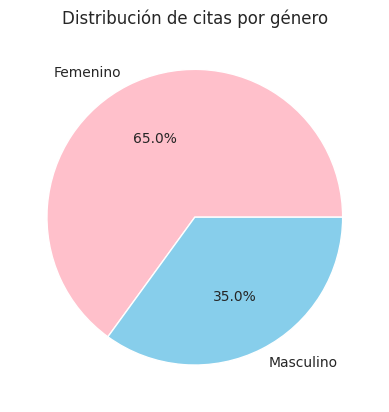

In [111]:
#Gráfico de torta para visualizar las proporciones de los valores de Gender
import matplotlib.pyplot as plt
conteo_genero = df['Gender'].value_counts()
plt.pie(conteo_genero, labels=['Femenino','Masculino'], autopct='%1.1f%%', colors=['pink','skyblue'])
plt.title('Distribución de citas por género')
plt.show()

### ScheduledDay

In [112]:
#Verifico el tipo de datos de ScheduledDay
df.ScheduledDay.dtype

dtype('O')

In [113]:
#Convierto ScheduledDay a DateTime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.ScheduledDay.dtype
df.ScheduledDay.head(10)

,ScheduledDay
0,2016-04-29 18:38:08+00:00
1,2016-04-29 16:08:27+00:00
2,2016-04-29 16:19:04+00:00
3,2016-04-29 17:29:31+00:00
4,2016-04-29 16:07:23+00:00
5,2016-04-27 08:36:51+00:00
6,2016-04-27 15:05:12+00:00
7,2016-04-27 15:39:58+00:00
8,2016-04-29 08:02:16+00:00
9,2016-04-27 12:48:25+00:00


In [114]:
#Verifico si posee valores nulos
scheduled_nulos = df['ScheduledDay'].isnull().sum()

if scheduled_nulos == 0:
  print("La columna 'ScheduledDay' no posee valores nulos.")
else:
  print(f"La columna 'ScheduledDay' posee {scheduled_nulos} valores nulos.")

La columna 'ScheduledDay' no posee valores nulos.


In [115]:
#Verifico el rango de fechas que posee el dataset previamente convertido a datetime.
df['ScheduledDay'] = df['ScheduledDay'].dt.date
fecha_minima = min(df['ScheduledDay'])
fecha_maxima = max(df['ScheduledDay'])

print(f"Rango de fechas (solo fecha): Desde {fecha_minima} hasta {fecha_maxima}")

Rango de fechas (solo fecha): Desde 2015-11-10 hasta 2016-06-08


El dataset posee valores precisos en la columna ScheduledDay con nanosegundos incluso e información de zona horaria.

Para un trabajo más claro, ordenado y legible se procederá a mantener la columna, pero se obtendrá información relevante de la misma para los posteriores análisis.

En ese sentido, se crea la columna **Scheduled_day_week** que contendrá el día de la semana del agendamiento de la cita.

También se creará otra columna sólo de la fecha, sin los segundos, se llamará **Scheduled_date**

**Seguiré la misma lógica para AppointmentDay.**

Finalmente, se creará otra columna con la diferencia en tiempo entre la fecha del agendamiento (ScheduledDay) y la fecha de la cita médica (AppointmentDay).

El nombre de la columna será **Days_Between**, de tipo datetime.

In [116]:
# Creo la nueva columna Scheduled_day_week
# Por alguna razón que desconozco debo hacer explícita la conversión a datetime
# en este paso, aunque la he realizado previamente.

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['Scheduled_day_week'] = df['ScheduledDay'].dt.day_name()
df['ScheduledDay'].head(10)

,ScheduledDay
0,2016-04-29
1,2016-04-29
2,2016-04-29
3,2016-04-29
4,2016-04-29
5,2016-04-27
6,2016-04-27
7,2016-04-27
8,2016-04-29
9,2016-04-27


In [117]:
#Creo la nueva columna Scheduled_date

df['Scheduled_date'] = df['ScheduledDay'].dt.date
df['Scheduled_date'].head(10)

,Scheduled_date
0,2016-04-29
1,2016-04-29
2,2016-04-29
3,2016-04-29
4,2016-04-29
5,2016-04-27
6,2016-04-27
7,2016-04-27
8,2016-04-29
9,2016-04-27


###AppointmentDay

In [118]:
# Creo la nueva columna AppointmentDay cuyos valores son los días de la semana
# del agendamiento de la cita
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['Appointment_day_week'] =  df['AppointmentDay'].dt.day_name()
df['Appointment_day_week'].head(10)


,Appointment_day_week
0,Friday
1,Friday
2,Friday
3,Friday
4,Friday
5,Friday
6,Friday
7,Friday
8,Friday
9,Friday


In [119]:
#Creco columna con la fecha sin segundos.
df['Appointment_date'] = df['AppointmentDay'].dt.date
df['Appointment_date'].head(10)

,Appointment_date
0,2016-04-29
1,2016-04-29
2,2016-04-29
3,2016-04-29
4,2016-04-29
5,2016-04-29
6,2016-04-29
7,2016-04-29
8,2016-04-29
9,2016-04-29


In [120]:
# Calcula la diferencia en días entre el agendamiento y la cita
beetween = (df['Appointment_date'] - df['Scheduled_date'])
beetween = pd.to_timedelta(beetween)
df['DaysBeetween'] = beetween.dt.days
df['DaysBeetween'].head(10)


,DaysBeetween
0,0
1,0
2,0
3,0
4,0
5,2
6,2
7,2
8,0
9,2


###DaysBeetween

In [121]:
#Verifico si posee valores negativos, esto sería una anomalía dado que
#no puede haber agendamientos posteriores a la cita.

conteo_nulos = (df['DaysBeetween'] < 0).sum()
if conteo_nulos == 0:
  print("La columna 'DaysBeetween' no posee valores negativos.")
else:
  print(f"La columna 'DaysBeetween' posee {conteo_nulos} valores negativos.")

La columna 'DaysBeetween' posee 5 valores negativos.


Al verificarse 5 valores negativos, se procede a eliminar dichas filas.

Esto es así dado que se trata de una anomalía, pues no es posible que un agendamiento de una cita sea posterior a la cita misma.

Estos registros son inconsistentes y no reflejan eventos reales, lo que los convierte en ruido de datos.

La decisión está basada en el impacto mínimo en el análisis, cinco registros de 110.000.


In [122]:
#Crea un nuevo DataFrame que contenga solo las filas de df donde la columna
#DaysBetween sea mayor o igual a cero, y luego reemplaza el DataFrame original.

df = df[df['DaysBeetween'] >= 0]



In [123]:
#La cantidad mínima y máxima de diferencia de días entre agendamiento y cita.
#Lo realizo para verificar si hay posibles anomalías.

print(f"La diferencia mínima entre agendamiento y cita es de {df['DaysBeetween'].min()} días.")
print(f"La diferencia máxima entre agendamiento y cita es de {df['DaysBeetween'].max()} días.")

#Considero que 179 días puede ser un valor real para algún estudio específico de salud.

La diferencia mínima entre agendamiento y cita es de 0 días.
La diferencia máxima entre agendamiento y cita es de 179 días.


In [124]:
#Verifico la cantidad de citas que se agendaron para el mismo día.

mismo_dia = (df['DaysBeetween'] == 0).sum()
print(f"La cantidad de citas agendadas para el mismo día es de {mismo_dia}.")




La cantidad de citas agendadas para el mismo día es de 38563.


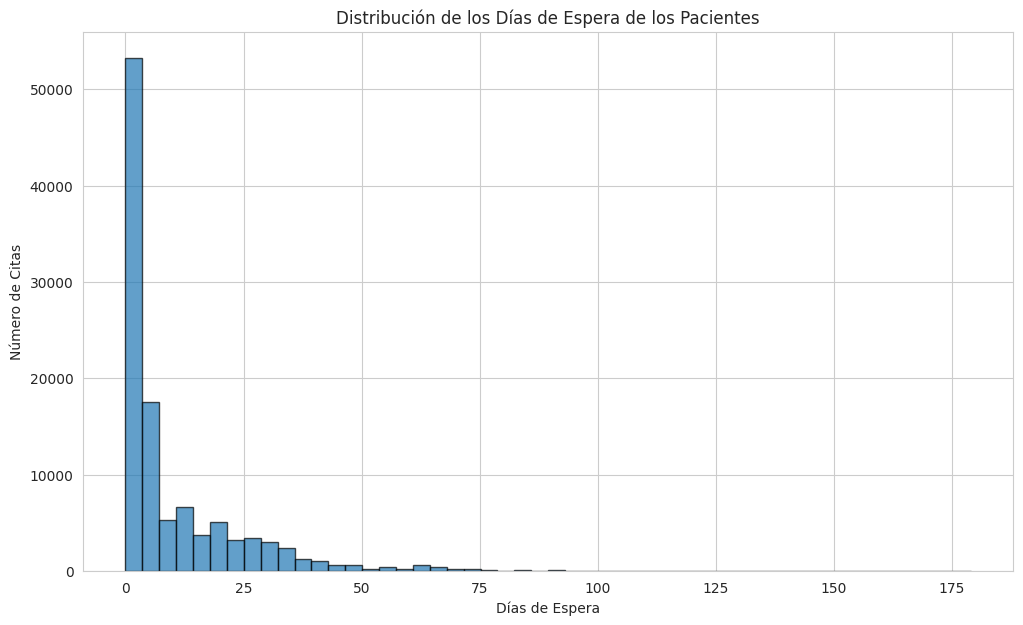

In [125]:
#Dado que 38563 de turnos para el mismo día es un número que considero
# importante en proporción al total, exploraré mediante un gráfico para
#visualizar los horarios en que se agendaron.
#La hipótesis es que la mayoría de los turnos hayan sido agendado por la mañana
#o mediodía.

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.hist(df['DaysBeetween'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribución de los Días de Espera de los Pacientes')
plt.xlabel('Días de Espera')
plt.ylabel('Número de Citas')
plt.show()

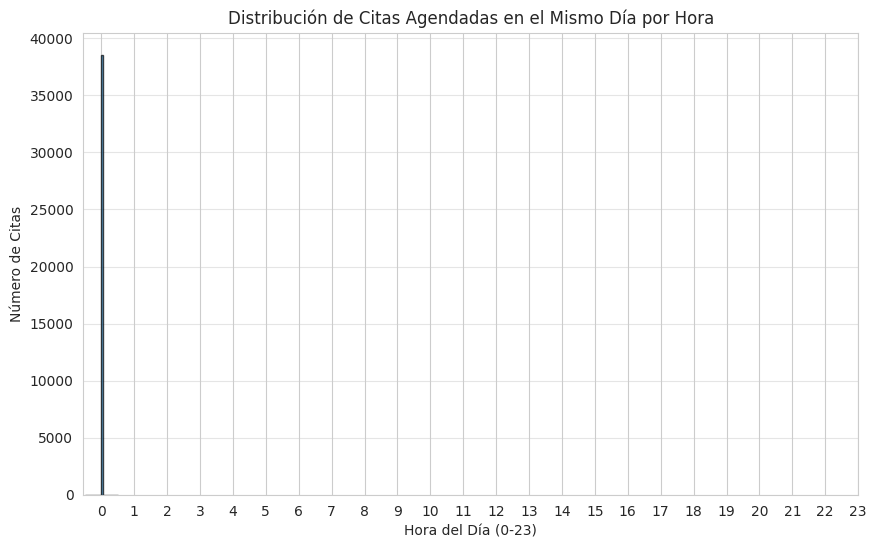

In [126]:
import matplotlib.pyplot as plt

# 1. Filtra los datos donde DaysBetween es 0
citas_mismo_dia = df[df['DaysBeetween'] == 0].copy()

# 2. Extrae la hora de ScheduledDay
citas_mismo_dia['ScheduledHour'] = citas_mismo_dia['ScheduledDay'].dt.hour

# 3. Crea el histograma
plt.figure(figsize=(10, 6))
plt.hist(citas_mismo_dia['ScheduledHour'], bins=24, edgecolor='black', alpha=0.7)
plt.title('Distribución de Citas Agendadas en el Mismo Día por Hora')
plt.xlabel('Hora del Día (0-23)')
plt.ylabel('Número de Citas')
plt.xticks(range(24))
plt.grid(axis='y', alpha=0.5)
plt.show()

In [127]:
print(df.loc[2, 'ScheduledDay']) # Muestra el valor completo de la primera fila
print(df['ScheduledDay'].dt.second.unique()) # Muestra todos los valores únicos de segundos

2016-04-29 00:00:00
[0]


### Age

In [128]:
#Verifico tipo de dato
df.Age.dtype

dtype('int64')

In [129]:
#Verifico si posee nulos
edad_nulos = df['Age'].isnull().sum()

if edad_nulos == 0:
  print("La columna 'Age' no posee valores nulos.")

La columna 'Age' no posee valores nulos.


In [130]:
#Verifico rango de edad que posee el dataset
edad_minima = df.Age.min()
edad_maxima = df.Age.max()

print(f"Rango de edad: Desde {edad_minima} hasta {edad_maxima}")

Rango de edad: Desde -1 hasta 115


Gracias al rango de edad se verifica que el valor -1 es una anomalía, se procede a calcular cuántos valores existen en el dataset con esta anomalía para tomar decisión.

Igualmente ocurre con el valor 115 años, si bien es posible que ocurra biológicamente, sin embargo su impacto puede ser menor y no considerarlo puede ser una opción.

In [131]:
#Calculo la cantidad de valores -1 en Age del datset
cantidad_negativos = (df['Age'] < 0).sum()
print(f"La columna 'Age' posee {cantidad_negativos} valores negativos.")

#Se decide descartar la fila con este valor dado su bajo impacto en la totalidad
#de los datos.

La columna 'Age' posee 1 valores negativos.


In [132]:
cantidad_mayores = (df['Age'] == 115).sum()
print(f"La columna 'Age' posee {cantidad_mayores} valores mayores a 115.")

#El dataset posee 5 filas para 115 años, considero que pose bajo impacto
#teniendo en cuenta los más de 110000 registros.

La columna 'Age' posee 5 valores mayores a 115.


In [133]:
#Crea un nuevo DataFrame que contenga solo las filas de df donde la columna
#Age sea mayor o igual a cero, y luego reemplaza el DataFrame original.

df = df[df['Age'] >= 0]

In [134]:
#Crea un nuevo DataFrame que contenga solo las filas de df donde la columna
#Age sea menore a 115, y luego reemplaza el DataFrame original.

df = df[df['Age'] < 115]

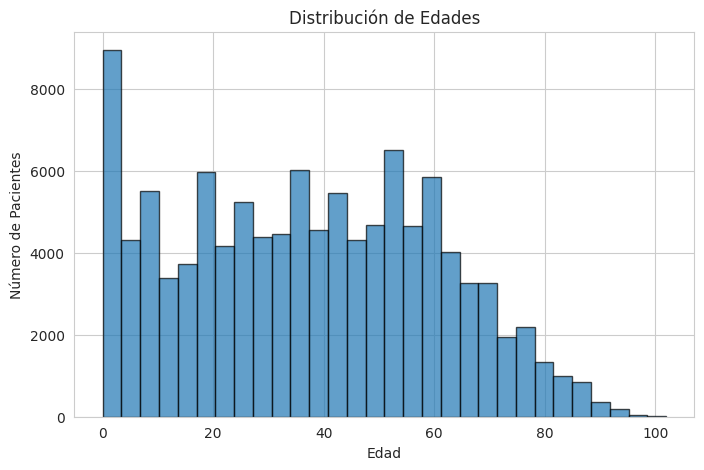

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Número de Pacientes')
plt.show()

En el Histograma se observa un pico principal en la franja de 0 años, recién nacidos o menores de un año.
En el resto se observan distintos picos, sin un grupo de edad que domine el conjunto de datos.
Los valores se observan en distribución bastante irregular con un descenso luego de los 60 años.


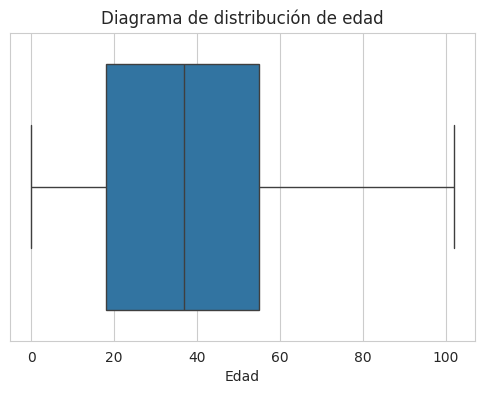

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'])
plt.title('Diagrama de distribución de edad')
plt.xlabel('Edad')
plt.show()

Se observa la mediana cercana a los 40 años, lo que implica que la mitad de los pacientes en el dataset tienen 40 años o menos.
Dado que en este gráfico la caja representa el 50% central de los datos, se puede observar que los pacientes se concentran entre poco menos de los 20 años a 55 años.
La mayoría de las edades se encuentran en un rango razonable.

###Neighbourhood

In [137]:
#Verifico tipo de dato
df.Neighbourhood.dtype

dtype('O')

In [138]:
#Verifico valores nulos
nulos = df.Neighbourhood.isnull().sum()
if nulos == 0:
  print("La columna 'Neighbourhood' no posee valores nulos.")
else:
  print(f"La columna 'Neighbourhood' posee {nulos} valores nulos.")

La columna 'Neighbourhood' no posee valores nulos.


In [139]:
#Verifico la cantidad de barrios únicos en el dataset.
print(f'La cantidad de barrios únicos en el dataset es de {df.Neighbourhood.nunique()}')

La cantidad de barrios únicos en el dataset es de 81


In [140]:
#Verifico cuáles son los barrios con más citas agendadas, los primeros 10.
df.Neighbourhood.value_counts().head(10)

,count
Neighbourhood,
JARDIM CAMBURI,7717
MARIA ORTIZ,5805
RESISTÊNCIA,4430
JARDIM DA PENHA,3877
ITARARÉ,3514
CENTRO,3334
SANTA MARTHA,3131
TABUAZEIRO,3131
JESUS DE NAZARETH,2853


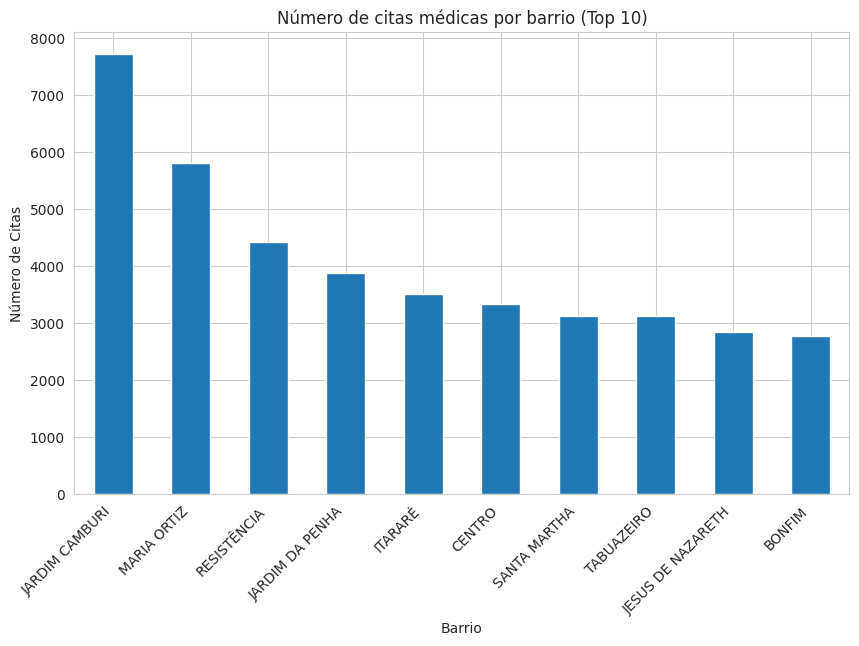

In [141]:
import matplotlib.pyplot as plt

# Seleccionar los 10 barrios con más citas
top_10_barrios = df['Neighbourhood'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_barrios.plot(kind='bar')
plt.title('Número de citas médicas por barrio (Top 10)')
plt.xlabel('Barrio')
plt.ylabel('Número de Citas')
plt.xticks(rotation=45, ha='right')
plt.show()

In [142]:
#convierto de object a category
df['Neighbourhood'] = df['Neighbourhood'].astype('category')
df.Neighbourhood.dtype

CategoricalDtype(categories=['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO',
                  'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA',
                  'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA',
                  'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO',
                  'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO',
                  'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE',
                  'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS',
                  'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS',
                  'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE',
                  'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE',
                  'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI',
                  'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC',
                  'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA',
                  'MONTE BELO', 'MORADA DE CAMB

###Columnas binarias
Se realiza un análisis mediante la utilización de un ciclo FOR, en base a los resultados que presente se irán tomando las decisiones correspondientes.
Las columnas que se analizarán de esta manera son: Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received


In [143]:
#Análisis mediante FOR de las columnas binarias.

# Lista de columnas a analizar
columnas_binarias = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

# Itera sobre cada columna
for col in columnas_binarias:
    print(f"--- Análisis de la columna: '{col}' ---")

    # 1. Verificar nulos
    nulos = df[col].isnull().sum()
    print(f"Número de valores nulos: {nulos}")

    # 2. Verificar el tipo de dato
    dtype = df[col].dtype
    print(f"Tipo de dato: {dtype}")

    # 3. Verificar valores únicos
    valores_unicos = df[col].unique()
    print(f"Valores únicos: {valores_unicos}")

    # 4. Calcular la proporción de cada valor
    proporcion = df[col].value_counts(normalize=True).round(2)
    print("Proporción de valores:")
    print(proporcion)

    print("\n" + "="*50 + "\n")

--- Análisis de la columna: 'Scholarship' ---
Número de valores nulos: 0
Tipo de dato: int64
Valores únicos: [0 1]
Proporción de valores:
Scholarship
0    0.9
1    0.1
Name: proportion, dtype: float64


--- Análisis de la columna: 'Hipertension' ---
Número de valores nulos: 0
Tipo de dato: int64
Valores únicos: [1 0]
Proporción de valores:
Hipertension
0    0.8
1    0.2
Name: proportion, dtype: float64


--- Análisis de la columna: 'Diabetes' ---
Número de valores nulos: 0
Tipo de dato: int64
Valores únicos: [0 1]
Proporción de valores:
Diabetes
0    0.93
1    0.07
Name: proportion, dtype: float64


--- Análisis de la columna: 'Alcoholism' ---
Número de valores nulos: 0
Tipo de dato: int64
Valores únicos: [0 1]
Proporción de valores:
Alcoholism
0    0.97
1    0.03
Name: proportion, dtype: float64


--- Análisis de la columna: 'Handcap' ---
Número de valores nulos: 0
Tipo de dato: int64
Valores únicos: [0 1 2 3 4]
Proporción de valores:
Handcap
0    0.98
1    0.02
2    0.00
3    0.00
4 

Del análisis de las columnas binarias, observo que Handcap posee 3 valores a investigar por posibilidad de atípicos (2, 3 y 4)

In [144]:
#Verifico la cantidad de valores únicos.
df['Handcap'].value_counts()

,count
Handcap,
0,108281
1,2036
2,183
3,13
4,3


Dado que la columna Handcap indica con 0 la ausencia de discapacidad, y 1 la presencia de discapacidad, los valores 2, 3 y 4 pueden ser interpretados formando parte de 1 (con discapacidad).
Otra posibilidad es descartar esos registros, sin embargo se llevará adelante la adecuación integrando las filas con valores 2, 3 y 4 dentro de 1.

In [145]:
#Todos los valores mayores a 0 serán registrados como 1, sin importar si fue 2, 3 o 4.
#Mantengo los valores 0 sin cambios.

df.loc[df['Handcap'] > 0, 'Handcap'] = 1
df.loc[df['Handcap'] == 0, 'Handcap'] = 0

df['Handcap'].value_counts()

,count
Handcap,
0,108281
1,2235


In [146]:
#La nueva proporción de Handcap queda:
proporcion_handcap = df['Handcap'].value_counts(normalize=True).round(2)
print("Proporción de valores:")
print(proporcion_handcap)


Proporción de valores:
Handcap
0    0.98
1    0.02
Name: proportion, dtype: float64


###No_show (Variable objetivo)

In [147]:
#Verifico tipo de dato
df.No_show.dtype

dtype('O')

In [148]:
#verifico si hay nulos
nulos = df.No_show.isnull().sum()
if nulos == 0:
  print("La columna 'No_show' no posee valores nulos.")
else:
  print(f"La columna 'No_show' posee {nulos} valores nulos.")

La columna 'No_show' no posee valores nulos.


In [149]:
#Verifico la cantidad de valores
df.No_show.value_counts()

,count
No_show,
No,88205
Yes,22311


No_show es una variable categórica binaria con valores "YES" y "NO".
En esta etapa de pre procesamiento es una buena práctica profesional convertir a INT.
Esto es así dado que los algoritmos de clasificación no pueden procesar directamente valores de texto.
De esta manera, ya tengo preparada la columna para esa etapa.

In [150]:
#convierto de object a numérico.
df['No_show'] = df['No_show'].map({'Yes': 1, 'No': 0})
df.No_show.dtype

dtype('int64')

## Hipótesis 1:
###La tasa de inasistencia por cita es significativamente menor cuando se ha recibido un mensaje de texto (SMS) de recordatorio.

In [151]:
#Diagnóstico de la variable SMS
proporcion_sms = df.SMS_received.value_counts(normalize=True).round(2)
print(f"Proporción de valores: {proporcion_sms}")


Proporción de valores: SMS_received
0    0.68
1    0.32
Name: proportion, dtype: float64


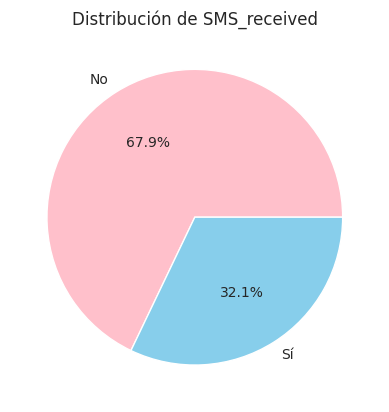

In [152]:
#Grafico pie chart de SMS_received
import matplotlib.pyplot as plt
conteo_sms = df['SMS_received'].value_counts()
plt.pie(conteo_sms, labels=['No','Sí'], autopct='%1.1f%%', colors=['pink','skyblue'])
plt.title('Distribución de SMS_received')
plt.show()

In [153]:
df.SMS_received.value_counts()

,count
SMS_received,
0,75035
1,35481


In [154]:
#Verifico la tasa de inasistencia respecto a la recepción de SMS.
tasa_no_show_por_sms = df.groupby('SMS_received')['No_show'].value_counts(normalize=True).unstack().round(3)

print("Tasa de Inasistencia por Recepción de SMS: ")
print(tasa_no_show_por_sms)

Tasa de Inasistencia por Recepción de SMS: 
No_show           0      1
SMS_received              
0             0.833  0.167
1             0.724  0.276


In [155]:
#Creo un gráfico de barras acumuladas donde comparo sms_received con No_show
#para confirmar o refutar la hipótesis 1.

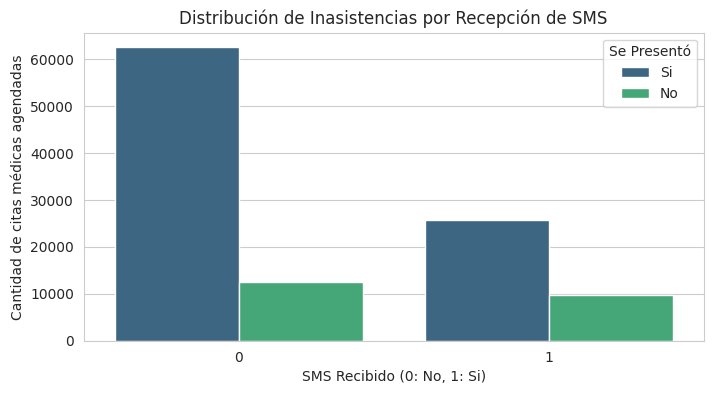

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de barras para la hipótesis
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='SMS_received', hue='No_show', palette='viridis')
plt.title('Distribución de Inasistencias por Recepción de SMS')
plt.xlabel('SMS Recibido (0: No, 1: Si)')
plt.ylabel('Cantidad de citas médicas agendadas')
plt.legend(title='Se Presentó', labels=['Si', 'No'])
plt.show()

###Conclusión respecto a la hipótesis 1

La hipótesis 1 es refutada según el análisis numérico y gráfico.

La tasa de inasistencia para las citas médicas agendadas donde el paciente recibió un SMS fue del 27.6%, mientras que en las citas donde no se recibió un SMS, la tasa fue del 16.7%.

Este hallazgo indica que los pacientes que reciben un recordatorio tienen una mayor propensión a no presentarse.

Aunque contraintuitivo, es probable (Debiera analizarse con otro set de datos) que el envío de SMS esté orientado a pacientes con riesgo a ausentarse.

También debiera analizarse la política de envío de SMS.

##Hipótesis 2
###Los pacientes que agendan su cita con mucha antelación son más propensos a no asistir.

Para confirmar o refutar esta hipótesis se procede a realizar un análisis numérico y gráfico.

Lo que se busca es analizar la distribución en el rango de valores de DaysBeeween en relación con la variable objetivo (No_show)


Text(0, 0.5, 'Frecuencia')

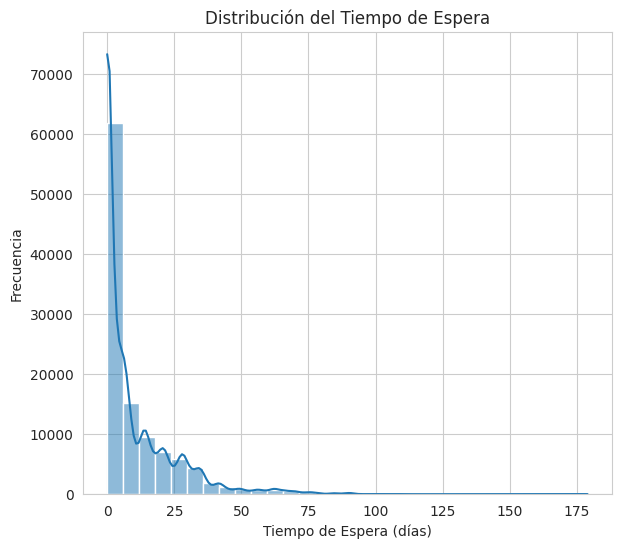

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(15, 6))

# Gráfico 1: Histograma de la distribución del tiempo de espera
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='DaysBeetween', bins=30, kde=True)
plt.title('Distribución del Tiempo de Espera')
plt.xlabel('Tiempo de Espera (días)')
plt.ylabel('Frecuencia')

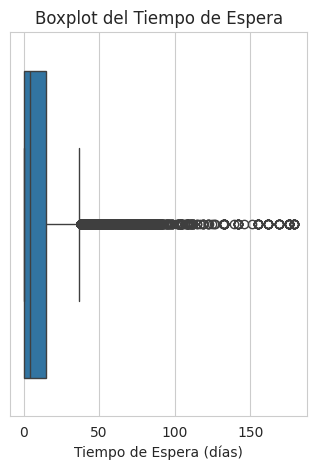

In [158]:

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='DaysBeetween')
plt.title('Boxplot del Tiempo de Espera')
plt.xlabel('Tiempo de Espera (días)')

plt.tight_layout()
plt.show()

Del análisis del histograma y del bloxplot se observa un fuerte sesgo hacia la derecha, lo que indica que la gran mayoría de los turnos se agendan con pocos días de anticipación.
Además, se observan gran cantidad de valores outliers.

Al ser sesgada, es preferible trabajar con la mediana antes que con el promedio, por su robustez ante los valores atípicos que se observan en la columna.


In [159]:
#Cálculo de mediana.

mediana_dias = df['DaysBeetween'].median()
print(f"La mediana del tiempo de espera es: {mediana_dias} días")

La mediana del tiempo de espera es: 4.0 días


In [160]:
#Cálculo de media
media_dias = df['DaysBeetween'].mean()
print(f"La media del tiempo de espera es: {media_dias.round(2)} días")

La media del tiempo de espera es: 10.18 días


De la visualización de los gráficos, la mediana es la que representa mejor la tendencia que se observa.

In [161]:
#Análisis descriptivo por grupo
analisis_descriptivo = df.groupby('No_show')['DaysBeetween'].describe().round(2)
print("Análisis Descriptivo del Tiempo de Espera por Estatus de Asistencia:")
print(analisis_descriptivo)

Análisis Descriptivo del Tiempo de Espera por Estatus de Asistencia:
           count   mean    std  min  25%   50%   75%    max
No_show                                                    
0        88205.0   8.75  14.55  0.0  0.0   2.0  12.0  179.0
1        22311.0  15.84  16.61  0.0  4.0  11.0  23.0  179.0


/tmp/ipython-input-2721445576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='No_show', y='DaysBeetween', data=df, palette='viridis')


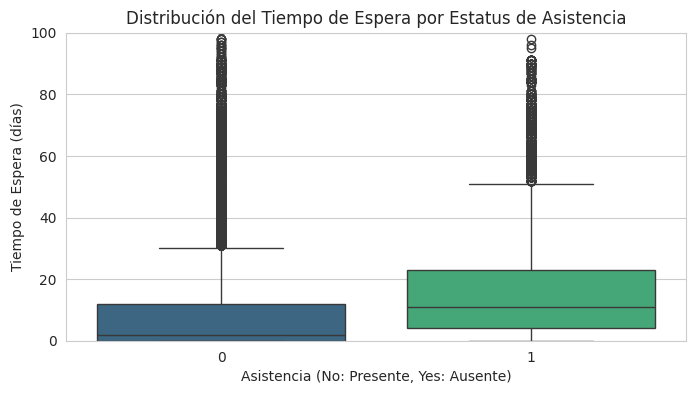

In [162]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='No_show', y='DaysBeetween', data=df, palette='viridis')
plt.title('Distribución del Tiempo de Espera por Estatus de Asistencia')
plt.xlabel('Asistencia (No: Presente, Yes: Ausente)')
plt.ylabel('Tiempo de Espera (días)')
plt.ylim(0, 100)
plt.show()

La mediana de los pacientes que faltaron a su cita es de 11 días, mientras que para los que asistieron es de solo 2 días.

Esto significa que el 50% de los pacientes que se ausentaron de la cita médica agendada, habían agendado la cita médica con 11 días o más de anticipación.

El 75% de los pacientes que asistieron agendaron su cita médica con 12 días o menos de espera, mientras que el 75% de los que no asistieron, agendaron su cita con 23 días o más de espera.

Este análisis pone de manifiesto que la hipótesis se ve confirmada, mientras más tiempo separe el agendamiento de la cita médica, más probable es que el paciente se ausente (No_show = 1).

Además en el gráfico se observa que los pacientes que se ausentaron de su cita médica previamente agendada tiene su mediana "más alta" que los que asistieron, indicando mayor cantidad de días de espera (11 días).

Por otro lado, la caja es más alta y ancha, esto demuestra que el 50% central de los pacientes que no asistieron tuvo una mayor variabilidad en su tiempo de espera.

Hay muchos valores atípicos (outliers) que se presentan o no se presentan incluso en grandes períodos de tiempo entre el agendamiento y la fecha de la cita médica.

En el gráfico también queda de manifiesto la conclusión a la que se llegó en el análisis numérico:

Un mayor tiempo de espera está correlacionado con una mayor tasa de inasistencia.

La mayoría de los pacientes que faltan a sus citas tienen un tiempo de espera mayor que aquellos que sí asisten.

##Hipótesis 3
###Los pacientes de los grupos de edad extremos (jóvenes y mayores) tienen una tasa de inasistencia más alta que la de los pacientes del grupo de edad intermedio.



Dado que Age es una variable continua. Para poder validar una hipótesis sobre grupos de edad, primero debemos discretizarla en las categorías de "Joven", "Intermedio" y "Mayor".

In [163]:
df['AgeGroup'] = 'Desconocido'
df.loc[df['Age'] <= 18, 'AgeGroup'] = 'Joven'
df.loc[(df['Age'] > 18) & (df['Age'] <= 60), 'AgeGroup'] = 'Intermedio'
df.loc[df['Age'] > 60, 'AgeGroup'] = 'Mayor'
df.AgeGroup.value_counts()


,count
AgeGroup,
Intermedio,61895
Joven,28865
Mayor,19756


Se procede a agrupar los pacientes en categorías (Joven, Intermedio, Mayor), esto es necesario para facilitar la comparación de la tasa de inasistencia entre los grupos.
Esta nueva columna permite analizar la hipótesis.

Para confirmar o refutar la hipótesis se requiere realizar el análisis a nivel numérico y también mediante visualización de gráfico.

Se analiza inicialmente la distribución de las categorías de la columna Agegroup respecto a la asistencia y no asistencia a la cita médica agendada.

In [164]:
tasa_no_show_por_edad = df.groupby('AgeGroup')['No_show'].value_counts(normalize=True).unstack().round(3)
print("Tasa de inasistencia por grupo de edadd:")
print(tasa_no_show_por_edad.to_markdown(numalign="left", stralign="left"))

Tasa de inasistencia por grupo de edadd:
| AgeGroup   | 0     | 1     |
|:-----------|:------|:------|
| Intermedio | 0.791 | 0.209 |
| Joven      | 0.78  | 0.22  |
| Mayor      | 0.848 | 0.152 |


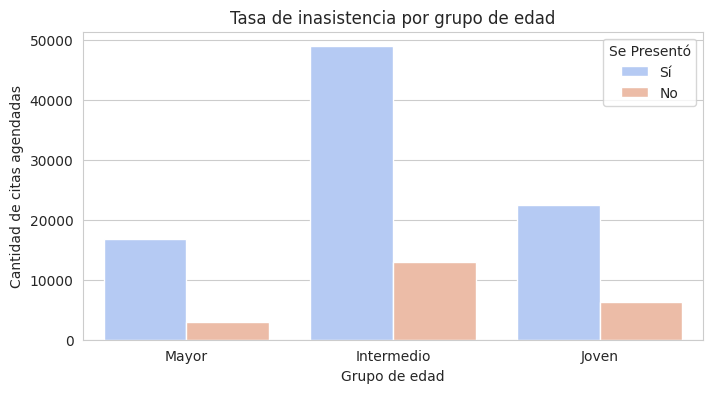

In [165]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='AgeGroup', hue='No_show', palette='coolwarm')
plt.title('Tasa de inasistencia por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad de citas agendadas')
plt.legend(title='Se Presentó', labels=['Sí', 'No'])
plt.show()


Los resultados refutan parcialmente la hipótesis original.

Se esperaba que tanto los más jóvenes como los más mayores tuvieran las tasas de inasistencia más altas, pero el análisis revela otro comportamiento.

El grupo de 'Mayores (60+)' muestra la tasa de inasistencia más baja con un 15.20%, siendo el grupo con mayor asistencia a las citas médicas agendadas.

Por otro lado, los 'Jóvenes (0-17)' e 'Intermedios' (18-59)' presentan tasas considerablemente más altas, de 22% y 20.9% respectivamente.

Esto sugiere que, si bien la inasistencia es un problema en las poblaciones de jóvenes e intermedio, los pacientes de la tercera edad (mayores) demuestran un mayor compromiso.

Por lo tanto, la edad es un factor influyente, pero la relación no es la que se planteó inicialmente, concentrándose el riesgo de inasistencia en los jóvenes primordialmente.

# **Data Engineering (Selección de Variables)**

El objetivo de esta fase es preparar el dataset para el modelado, lo que incluye la selección de las características más relevantes para reducir la dimensionalidad y mejorar el rendimiento del modelo.

**Método de Selección de Características:**

Se utilizará el método de selección univariada SelectKBest junto con la prueba estadística chi-cuadrado (χ²).


El problema requiere identificar qué variables categóricas (Gender, Scholarship, AgeGroup, etc.) tienen una mayor asociación con la variable objetivo (No_show).

**Para evaluar la independencia entre valores categóricas se usará la prueba chi-cuadrado.**

Al seleccionar las características con las puntuaciones de χ² más altas, se busca que el modelo se entrene con la información más predictiva.

Para procesar la información, primero es necesario transformar las variables categóricas (Gender, Neighbourhood y AgeGroup) a un formato numérico que sea interpretable por el modelo.



In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Codificación de variables categóricas a numéricas
le = LabelEncoder()
df['Neighbourhood_encoded'] = le.fit_transform(df['Neighbourhood'])
df['AgeGroup_encoded'] = le.fit_transform(df['AgeGroup'])
df['Gender_encoded'] = le.fit_transform(df['Gender'])

 El siguiente paso es seleccionar las características más influyentes.

 Esto permite entrenar un modelo más eficiente y preciso.

 Para ello, se utilizará SelectKBest con la prueba estadística chi-cuadrado (χ²), para evaluar la relación entre las variables categóricas y la variable objetivo No_show.

In [167]:
features = [
    'Gender_encoded', 'Age', 'Scholarship', 'Hipertension',
    'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
    'Neighbourhood_encoded', 'AgeGroup_encoded'
]
target = 'No_show'

X = df[features]
y = df[target]

# Aplicar la selección de las 5 mejores características
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("--- Características Seleccionadas por el Modelo ---")
print(list(selected_features))

--- Características Seleccionadas por el Modelo ---
['Age', 'Hipertension', 'SMS_received', 'Neighbourhood_encoded', 'AgeGroup_encoded']


**Selección, Entrenamiento y Evaluación del Algoritmo**
Con las 5 mejores características ya seleccionadas, se procede a elegir el algoritmo.

La Regresión Logística por su eficiencia es el modelo que se elige para establecer una base de referencia.

Se divide el dataset en un conjunto de entrenamiento (70%) y uno de prueba (30%), se entrena el modelo y se utiliza para predecir el ausentismo en el conjunto de prueba.

In [168]:
# Dividir el dataset, entrenar el modelo y realizar predicciones
X_selected = df[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42, stratify=y)

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Finalmente, se evalua el rendimiento del modelo utilizando métricas de clasificación estándar y la matriz de confusión para entender en detalle sus aciertos y errores.

In [169]:
# Calcular y mostrar los resultados de la validación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print("-" * 50)
print("--- Resultados de la Validación del Modelo ---")
print(f"Accuracy (Exactitud): {accuracy:.4f}")
print(f"Precision (Precisión): {precision:.4f}")
print(f"Recall (Sensibilidad): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nMatriz de Confusión:\n", conf_matrix)

--------------------------------------------------
--- Resultados de la Validación del Modelo ---
Accuracy (Exactitud): 0.7981
Precision (Precisión): 0.0000
Recall (Sensibilidad): 0.0000
F1-Score: 0.0000

Matriz de Confusión:
 [[26462     0]
 [ 6693     0]]


# Conclusiones

El desarrollo y evaluación del modelo predictivo permite llegar a conclusiones validando el ciclo completo del proyecto.

### Validación de hipótesis
El proceso de selección de características  permite confirmar estadísticamente las hipótesis surgidas durante el EDA:

1. Hipótesis del SMS: VALIDADA. SMS_received fue seleccionada como una de las 5 variables más importantes, lo que confirma que existe una relación estadísticamente significativa entre recibir un SMS y la asistencia a la cita.

2. Hipótesis de la edad: Age fue seleccionada como una variable clave. Esto confirma que la edad es un factor determinante en la probabilidad de ausentismo, validando la hipótesis.

3. Hipótesis de la beca: Scholarship fue identificada como una de las características más predictivas, lo que confirma que ser beneficiario de la beca tiene una relación fuerte con el comportamiento de asistencia del paciente.

**Hallazgo Principal: **
Precisión y sensibilidad en cero, compele al diagnóstico del modelo.

Se entiende que el algoritmo identificó que la gran mayoría de los pacientes, cercanos al 80%, asisten a sus citas.

El modelo enotnces asume una estrategia conservadora, predice el resultado más frecuente (asistió)

Si bien esto le otorga una alta tasa de aciertos, anula la capacidad del modelo para detectar los casos de inasistencia, que son menos comunes en el dataset.

Este es el motivo por el cual la matriz de confusión muestra que nunca se predijo un 1 (No Asistió).

Este hallazgo proporciona un camino para futuras iteraciones del proyecto:

- Analizar la variable  DaysBeetween (días de espera entre la solicitud y la cita). Es muy probable que esta variable, que no se ha usado, tenga poder predictivo y pueda ayudar al modelo a diferenciar mejor entre los dos tipos de pacientes.

- Explorar algoritmos alternativos:
La Regresión Logística ha sido un paso natural, probablemente otros algoritmos de clasificación permitan detectar patrones en las minorías de pacientes, o sea, los que no asisten.

En conclusión, si bien se podría explorar otros algoritmos o ahondar en otras estrategias que escapan al presente curso, considero que se ha cumplido el objetivo general.

Se han validado las hipótesis iniciales y se ha  identificado su comportamiento, estableciendo una hoja de ruta coherente con el ciclo de desarrollo de ciencia de datos.